In [ ]:
from sklearn.preprocessing import OneHotEncoder
from flask import Flask, render_template, request
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPRegressor
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')


In [ ]:
def posix_time(dt):
    return (dt - datetime(1970, 1, 1)) / timedelta(seconds=1)

IMPORTING THE DATA SET

In [ ]:
data = pd.read_csv('/content/traffic_volume_data.csv')

taking the required features or columns

In [ ]:
data = data.sort_values(
    by=['date_time'], ascending=True).reset_index(drop=True)
last_n_hours = [1, 2, 3, 4, 5, 6]
for n in last_n_hours:
    data[f'last_{n}_hour_traffic'] = data['traffic_volume'].shift(n)
data = data.dropna().reset_index(drop=True)
data.loc[data['is_holiday'] != 'None', 'is_holiday'] = 1
data.loc[data['is_holiday'] == 'None', 'is_holiday'] = 0
data['is_holiday'] = data['is_holiday'].astype(int)

data['date_time'] = pd.to_datetime(data['date_time'])
data['hour'] = data['date_time'].map(lambda x: int(x.strftime("%H")))
data['month_day'] = data['date_time'].map(lambda x: int(x.strftime("%d")))
data['weekday'] = data['date_time'].map(lambda x: x.weekday()+1)
data['month'] = data['date_time'].map(lambda x: int(x.strftime("%m")))
data['year'] = data['date_time'].map(lambda x: int(x.strftime("%Y")))
data.to_csv("traffic_volume_data.csv", index=None)

In [ ]:
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
data = pd.read_csv("traffic_volume_data.csv")
data = data.sample(10000).reset_index(drop=True)
label_columns = ['weather_type', 'weather_description']
numeric_columns = ['is_holiday', 'temperature',
                       'weekday', 'hour', 'month_day', 'year', 'month']

In [ ]:
features = numeric_columns+label_columns
X = data[features]
X.head()


X.shape


(10000, 9)

In [ ]:

from functools import reduce
def unique(list1):
    ans = reduce(lambda re, x: re+[x] if x not in re else re, list1, [])
    print(ans)

n1 = data['weather_type']
n2 = data['weather_description']
unique(n1)
unique(n2)
n1features = ['Rain', 'Clouds', 'Clear', 'Snow', 'Mist',
              'Drizzle', 'Haze', 'Thunderstorm', 'Fog', 'Smoke', 'Squall']
n2features = ['light rain', 'few clouds', 'Sky is Clear', 'light snow', 'sky is clear', 'mist', 'broken clouds', 'moderate rain', 'drizzle', 'overcast clouds', 'scattered clouds', 'haze', 'proximity thunderstorm', 'light intensity drizzle', 'heavy snow', 'heavy intensity rain', 'fog', 'heavy intensity drizzle', 'shower snow', 'snow', 'thunderstorm with rain',
              'thunderstorm with heavy rain', 'thunderstorm with light rain', 'proximity thunderstorm with rain', 'thunderstorm with drizzle', 'smoke', 'thunderstorm', 'proximity shower rain', 'very heavy rain', 'proximity thunderstorm with drizzle', 'light rain and snow', 'light intensity shower rain', 'SQUALLS', 'shower drizzle', 'thunderstorm with light drizzle']
"""#Data Preparation"""

n11 = []
n22 = []
for i in range(10000):
    if(n1[i]) not in n1features:
        n11.append(0)
    else:
        n11.append((n1features.index(n1[i]))+1)
    if n2[i] not in n2features:
        n22.append(0)
    else:
        n22.append((n2features.index(n2[i]))+1)
# print(n11)
# print(n22)
data['weather_type'] = n11
data['weather_description'] = n22

['Mist', 'Clear', 'Clouds', 'Rain', 'Haze', 'Fog', 'Thunderstorm', 'Smoke', 'Snow', 'Drizzle', 'Squall']
['mist', 'sky is clear', 'overcast clouds', 'few clouds', 'very heavy rain', 'Sky is Clear', 'haze', 'broken clouds', 'fog', 'proximity thunderstorm', 'light rain', 'smoke', 'scattered clouds', 'heavy snow', 'light snow', 'snow', 'heavy intensity rain', 'thunderstorm with rain', 'moderate rain', 'light intensity drizzle', 'thunderstorm with heavy rain', 'proximity thunderstorm with drizzle', 'drizzle', 'proximity shower rain', 'thunderstorm with light rain', 'light intensity shower rain', 'heavy intensity drizzle', 'thunderstorm', 'proximity thunderstorm with rain', 'light rain and snow', 'light shower snow', 'freezing rain', 'thunderstorm with drizzle', 'SQUALLS']


Data Preparation

In [ ]:
features = numeric_columns+label_columns
target = ['traffic_volume']
X = data[features]
y = data[target]


X.head(6)

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,1,294.04,2,9,6,2016,9,5,6
1,1,257.11,5,8,22,2013,3,3,5
2,1,274.44,2,8,3,2013,12,5,6
3,1,288.75,1,15,5,2015,10,2,10
4,1,291.42,2,9,9,2013,7,5,6
5,1,282.06,5,1,13,2016,5,2,2


[[<Axes: title={'center': 'is_holiday'}>
  <Axes: title={'center': 'temperature'}>
  <Axes: title={'center': 'weekday'}>]
 [<Axes: title={'center': 'hour'}> <Axes: title={'center': 'month_day'}>
  <Axes: title={'center': 'year'}>]
 [<Axes: title={'center': 'month'}>
  <Axes: title={'center': 'weather_type'}>
  <Axes: title={'center': 'weather_description'}>]]


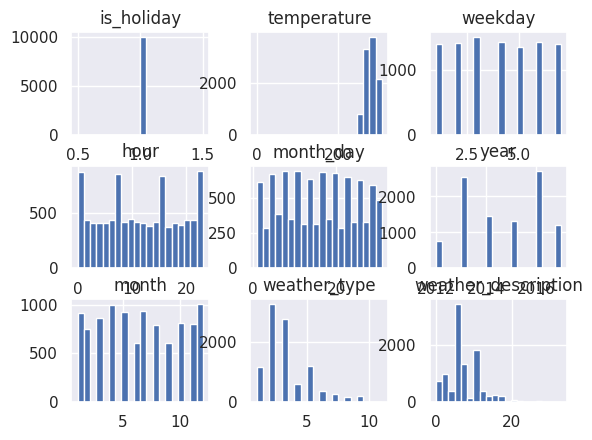

In [ ]:
print(data[features].hist(bins=20,))

Feature Scaling

In [ ]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y).flatten()
warnings.filterwarnings('ignore')


print(X[:5])

[[0.         0.95678771 0.16666667 0.39130435 0.16666667 0.8
  0.72727273 0.4        0.18181818]
 [0.         0.83661981 0.66666667 0.34782609 0.7        0.2
  0.18181818 0.2        0.15151515]
 [0.         0.89301054 0.16666667 0.34782609 0.06666667 0.2
  1.         0.4        0.18181818]
 [0.         0.93957439 0.         0.65217391 0.13333333 0.6
  0.81818182 0.1        0.3030303 ]
 [0.         0.9482624  0.16666667 0.39130435 0.26666667 0.2
  0.54545455 0.4        0.18181818]]


Visualization

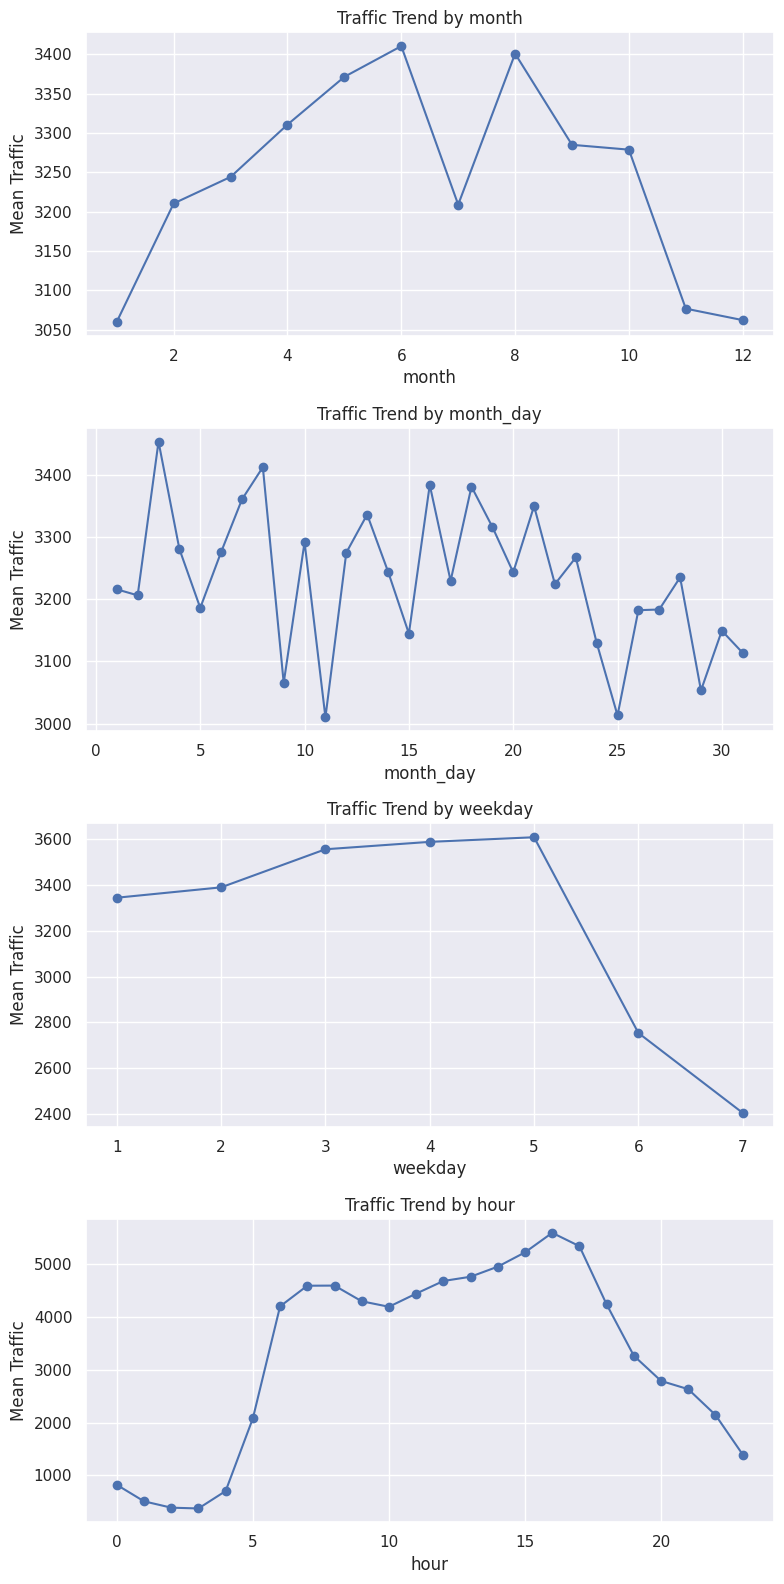

In [ ]:
metrics = ['month', 'month_day', 'weekday', 'hour']
fig = plt.figure(figsize=(8, 4*len(metrics)))
for i, metric in enumerate(metrics):
	ax = fig.add_subplot(len(metrics), 1, i+1)
	ax.plot(data.groupby(metric)['traffic_volume'].mean(), '-o')
	ax.set_xlabel(metric)
	ax.set_ylabel("Mean Traffic")
	ax.set_title(f"Traffic Trend by {metric}")
plt.tight_layout()
plt.show()

Train the Model

In [ ]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X, y)
new = []
print('predicted output :=',regr.predict(X[:10]))
print('Actual output :=',y[:10])

predicted output := [0.69551058 0.64457131 0.68411837 0.74256268 0.75065785 0.11931993
 0.38195564 0.59888998 0.3782943  0.30231069]
Actual output := [0.6628198  0.7730812  0.8266129  0.8099277  0.70397664 0.05798109
 0.37458287 0.73581758 0.37055061 0.29449388]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)
y_pred = regr.predict(testX)
print('Mean Absolute Error:', mean_absolute_error(testY, y_pred))

Mean Absolute Error: 0.07814041087852923


In [ ]:
print(features)

['is_holiday', 'temperature', 'weekday', 'hour', 'month_day', 'year', 'month', 'weather_type', 'weather_description']


In [ ]:
data[features].head(5)

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,1,294.04,2,9,6,2016,9,5,6
1,1,257.11,5,8,22,2013,3,3,5
2,1,274.44,2,8,3,2013,12,5,6
3,1,288.75,1,15,5,2015,10,2,10
4,1,291.42,2,9,9,2013,7,5,6


User input

In [ ]:
ip=[0,161,63,3,326,3,3,293.1,4770]
ip = x_scaler.transform([ip])
out=regr.predict(ip)
print('Before inverse Scaling :',out)

Before inverse Scaling : [74.26216668]


In [ ]:
y_pred = y_scaler.inverse_transform([out])
print('Traffic Volume : ',y_pred)

Traffic Volume :  [[534093.50276333]]


In [ ]:
ip = []
if(y_pred<=1000):
  print("No Traffic ")
elif y_pred>1000 and y_pred<=3000:
  print("Busy or Normal Traffic")
elif y_pred>3000 and y_pred<=5500:
  print("heavy Traffic")
else:
  print("Worst case")

Worst case


In [ ]:
from sklearn.linear_model import LinearRegression
import pickle
model_lr = LinearRegression()
with open('trafficprediction.pkl', 'wb') as file:
    pickle.dump(model_lr, file)